In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

Image shape:  (1123, 3064, 4)


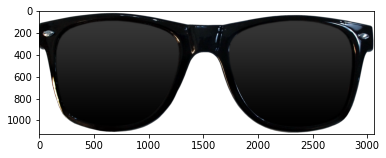

In [5]:
sunglasses = cv2.imread('sample_data/images/sunglasses.png', cv2.IMREAD_UNCHANGED)

plt.imshow(sunglasses)
print('Image shape: ', sunglasses.shape)

The alpha channel looks like this (black pixels = transparent): 


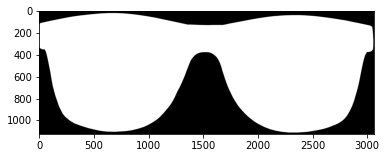

In [6]:
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')

In [7]:
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)

The non-zero values of the alpha channel are: 
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


In [8]:
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /data/test/Elmar_Brok_21.jpg  
  inflating: /data/test/Elmar_Brok_30.jpg  
  inflating: /data/test/Elmar_Brok_31.jpg  
  inflating: /data/test/Elsa_Zylberstein_00.jpg  
  inflating: /data/test/Elsa_Zylberstein_01.jpg  
  inflating: /data/test/Elsa_Zylberstein_10.jpg  
  inflating: /data/test/Elsa_Zylberstein_11.jpg  
  inflating: /data/test/Elsa_Zylberstein_40.jpg  
  inflating: /data/test/Elsa_Zylberstein_41.jpg  
  inflating: /data/test/Elton_John_10.jpg  
  inflating: /data/test/Elton_John_11.jpg  
  inflating: /data/test/Elton_John_20.jpg  
  inflating: /data/test/Elton_John_21.jpg  
  inflating: /data/test/Elton_John_30.jpg  
  inflating: /data/test/Elton_John_31.jpg  
  inflating: /data/test/Elton_John_40.jpg  
  inflating: /data/test/Elton_John_41.jpg  
  inflating: /data/test/Emile_Lahoud_00.jpg  
  inflating: /data/test/Emile_Lahoud_01.jpg  
  inflating: /data/test/Emile_Lahoud_30.jpg  
  inflatin

In [9]:
key_pts_frame = pd.read_csv('/data/training_frames_keypoints.csv')

print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


In [10]:
def show_keypoints(image, key_pts,color='m'):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c=color)

Image name:  Christopher_Walken_01.jpg


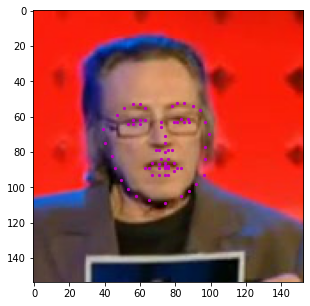

In [11]:
n = 120
image_name = key_pts_frame.iloc[n, 0]
image = mpimg.imread(os.path.join('/data/training/', image_name))
key_pts = key_pts_frame.iloc[n, 1:].to_numpy()
key_pts = key_pts.astype('float').reshape(-1, 2)

print('Image name: ', image_name)

plt.figure(figsize=(5, 5))
show_keypoints(image, key_pts)
plt.show()

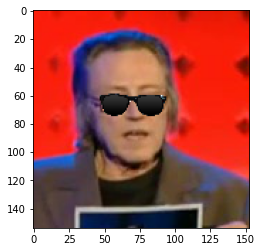

In [12]:
image_copy = np.copy(image)

x = int(key_pts[17, 0])
y = int(key_pts[17, 1])


h = int(abs(key_pts[27,1] - key_pts[34,1]))

w = int(abs(key_pts[17,0] - key_pts[26,0]))


sunglasses = cv2.imread('sample_data/images/sunglasses.png', cv2.IMREAD_UNCHANGED)
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)

roi_color = image_copy[y:y+h,x:x+w]

ind = np.argwhere(new_sunglasses[:,:,3] > 0)

for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
image_copy[y:y+h,x:x+w] = roi_color

plt.imshow(image_copy)

Image name:  Daisy_Fuentes_30.jpg


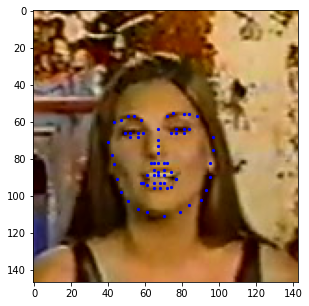

0.5103980675269569


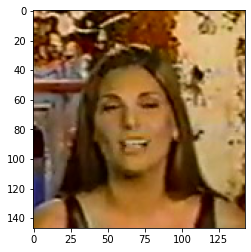

In [14]:
def distance(a,b):
    dist = np.linalg.norm(a-b)
    return dist
def smile_parameter(fcpts):
    # (49,55),(51,59),(52,58),(53,57)
    mouth_kpts = fcpts[[48,54,50,58,51,57,52,56],:]
    ratio = (distance(mouth_kpts[2],mouth_kpts[3])+distance(mouth_kpts[4],mouth_kpts[5])+distance(mouth_kpts[6],mouth_kpts[7]))/(3* distance(mouth_kpts[0],mouth_kpts[1]))
    return ratio

n = 28
image_name = key_pts_frame.iloc[n, 0]
image = mpimg.imread(os.path.join('/data/training/', image_name))
key_pts = key_pts_frame.iloc[n, 1:].to_numpy()
key_pts = key_pts.astype('float').reshape(-1, 2)
print('Image name: ', image_name)
plt.figure(figsize=(5, 5))
show_keypoints(image, key_pts,'b')
plt.show()
ratio = smile_parameter(key_pts)
print(ratio)
plt.imshow(image)